# Table of Contents

## 6) Churn Prediction Modeling

### Objectives
- Develop and evaluate machine learning models for predicting customer churn.
- Analyze model performance and derive actionable business insights.

### Workflow
1. Baseline Model: Logistic Regression
2. Addressing Class Imbalance with SMOTE
3. Advanced Models: Random Forest, Gradient Boosting, XGBoost
4. Hyperparameter Tuning
5. Feature Importance Analysis
6. Model Comparison and Insights
7. Conclusion and Recommendations


### Baseline Model
- Purpose: Establish a simple baseline for comparison with advanced models.

With no missing values and a clean dataset, we're ready to build a baseline model. Use a simple classification algorithm (e.g., Logistic Regression) to predict Churn Value.


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("../data/processed/cleaned_data1.csv")

# Display a summary to verify
print(df.head())



   CustomerID  Count        Country       State         City  \
0  3668-QPYBK      1  United States  California  Los Angeles   
1  9237-HQITU      1  United States  California  Los Angeles   
2  9305-CDSKC      1  United States  California  Los Angeles   
3  7892-POOKP      1  United States  California  Los Angeles   
4  0280-XJGEX      1  United States  California  Los Angeles   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  ...  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No  ...   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No  ...   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No  ...   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No  ...   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No  ...   

  Churn Value Churn Score  CLTV                   Churn Reason State_freq  \
0           1          86  3239   Competitor made better 

### Linear Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features and target
features = ['Churn Score', 'Avg Monthly Spend', 'Monthly Charges', 'Tenure Months']
target = 'Churn Value'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1009
           1       0.81      0.79      0.80       400

    accuracy                           0.89      1409
   macro avg       0.86      0.86      0.86      1409
weighted avg       0.89      0.89      0.89      1409



 ### Addressing Class Imbalance

- Class Imbalance:

There are significantly more non-churned customers (1,009) than churned customers (400) in the test set. This imbalance may bias the model toward predicting non-churn.
The relatively lower recall (79%) for churned customers suggests that the model struggles to identify all churned cases.


- Key Features:

The selected features (Churn Score, Avg Monthly Spend, Monthly Charges, Tenure Months) seem to capture meaningful signals for predicting churn. However, further analysis is needed to refine feature importance.

#### Appling SMOTE to balance the dataset

In [3]:
!pip install --upgrade imbalanced-learn



In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


- Why Use SMOTE?


SMOTE generates synthetic samples for the minority class (churned customers in this case) to balance the dataset.
It ensures the model doesn’t bias predictions toward the majority class (non-churned customers).

In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({0: 4165, 1: 4165})


As we can see it has an even class distribution (e.g., equal counts of churned and non-churned customers).

### Retrain the Logistic Regression Model
With the balanced dataset, retrain the logistic regression model to evaluate its performance.

In [6]:
# Retrain Logistic Regression on the balanced dataset
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Classification report
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1009
           1       0.73      0.91      0.81       400

    accuracy                           0.88      1409
   macro avg       0.84      0.89      0.86      1409
weighted avg       0.89      0.88      0.88      1409

ROC AUC Score: 0.96


#### Feature Importance Analysis:


Feature Importance:
Churn Score          0.204932
Monthly Charges      0.026981
Avg Monthly Spend    0.006623
Tenure Months       -0.061257
dtype: float64


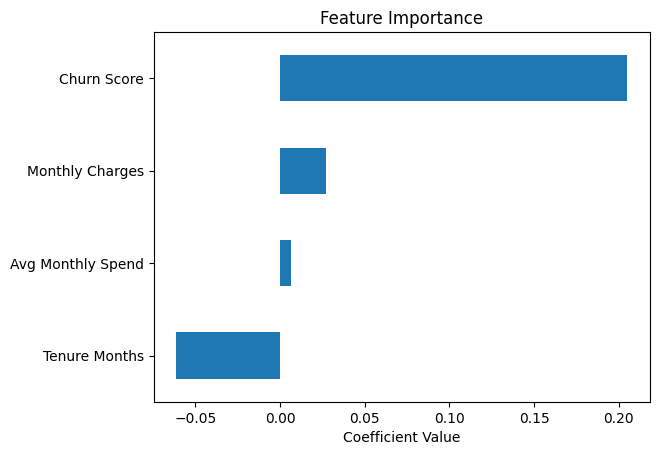

In [7]:
# Feature importance from Logistic Regression
feature_importance = pd.Series(logistic_model.coef_[0], index=X.columns)
print("\nFeature Importance:")
print(feature_importance.sort_values(ascending=False))

# Visualize feature importance
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Coefficient Value')
plt.show()


### Advanced Models:

We proceed to train more advanced models like Random Forest, Gradient Boosting and XGBoost. These models can capture non-linear relationships and interactions between features.


**Random Forest**

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on resampled data
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC Score (Random Forest): {roc_auc_rf:.2f}")


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1009
           1       0.79      0.89      0.84       400

    accuracy                           0.90      1409
   macro avg       0.87      0.90      0.88      1409
weighted avg       0.91      0.90      0.90      1409

ROC AUC Score (Random Forest): 0.97


**Gradient Boosting**

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# ROC AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"ROC AUC Score (Gradient Boosting): {roc_auc_gb:.2f}")


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1009
           1       0.76      0.92      0.84       400

    accuracy                           0.90      1409
   macro avg       0.87      0.90      0.88      1409
weighted avg       0.91      0.90      0.90      1409

ROC AUC Score (Gradient Boosting): 0.98


**XGBoost**

In [14]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.6/124.9 MB 25.1 MB/s eta 0:00:05
   -- ------------------------------------- 7.9/124.9 MB 23.2 MB/s eta 0:00:06
   --- ------------------------------------ 11.0/124.9 MB 20.8 MB/s eta 0:00:06
   ---- ----------------------------------- 13.9/124.9 MB 18.6 MB/s eta 0:00:06
   ----- ---------------------------------- 16.8/124.9 MB 17.6 MB/s eta 0:00:07
   ------ --------------------------------- 19.4/124.9 MB 16.6 MB/s eta 0:00:07
   ------ --------------------------------- 21.2/124.9 MB 15.3 MB/s eta 0:00:07
   ------- -------------------------------- 23.3/124.9 MB 14.6 MB/s eta 0:00:07
   ------- -------------------------------- 24.6/124.9 MB 13.8 MB/s eta 0:00:08
   -------- ------------------------------- 26.2/124.9 MB 13.1 MB/s eta 0:00:08
   -------- ------------------------------- 28.0/124.9 MB 12.6 MB/s eta 0:00:08
   --------- ------------------------------ 30.4/12

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [16]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# ROC AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f"ROC AUC Score (XGBoost): {roc_auc_xgb:.2f}")


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1009
           1       0.80      0.89      0.84       400

    accuracy                           0.90      1409
   macro avg       0.88      0.90      0.89      1409
weighted avg       0.91      0.90      0.91      1409

ROC AUC Score (XGBoost): 0.97


C:\Users\pinto\anaconda3\envs\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:17:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


- **Visualize Model Performance**

Compare the performance of Logistic Regression and Random Forest using metrics like ROC curves.

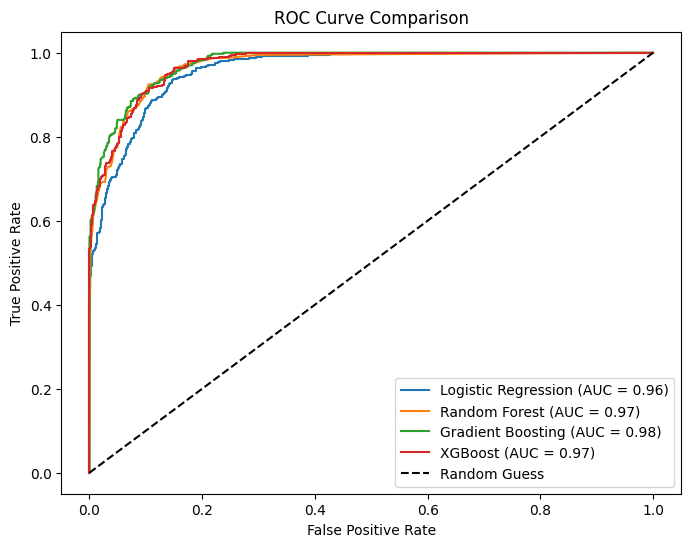

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()



Based on the ROC curve comparison the Gradient Boosting is already outperforming the other models with an AUC of 0.98, and other models like XGBoost and Random Forest are also performing quite well (AUCs around 0.97).

### Gradient Boosting Hyperparameter Tuning

Purpose: Optimize the best-performing model to achieve better performance.


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initializing Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid_gb,
    n_iter=10,  # Reduce number of iterations for debugging
    scoring='roc_auc',
    cv=3,  # Use 3-fold cross-validation to reduce computation
    verbose=1,
    n_jobs=1,  # Limit number of parallel jobs
    random_state=42
)

# Fit RandomizedSearchCV
random_search_gb.fit(X_resampled, y_resampled)

# Best parameters and score
print(f"Best Parameters: {random_search_gb.best_params_}")
print(f"Best ROC AUC Score: {random_search_gb.best_score_:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
Best ROC AUC Score: 0.99


### Retrainning the Gradient Boosting Model with Optimal Parameters
Now that we have the best parameters (subsample: 0.8, n_estimators: 200, max_depth: 7, learning_rate: 0.2), we should retrain the Gradient Boosting model on the training set (X_resampled, y_resampled) using these optimal hyperparameters.

In [19]:
# Retrain Gradient Boosting with best parameters
gb_best = GradientBoostingClassifier(
    random_state=42,
    subsample=0.8,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2
)

# Fit the model
gb_best.fit(X_resampled, y_resampled)

# Evaluate on the test set
y_pred_gb_best = gb_best.predict(X_test)
y_pred_proba_gb_best = gb_best.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report (Optimized Gradient Boosting):")
print(classification_report(y_test, y_pred_gb_best))

# ROC AUC Score
roc_auc_gb_best = roc_auc_score(y_test, y_pred_proba_gb_best)
print(f"Optimized Gradient Boosting ROC AUC Score: {roc_auc_gb_best:.2f}")


Classification Report (Optimized Gradient Boosting):
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1009
           1       0.79      0.90      0.84       400

    accuracy                           0.90      1409
   macro avg       0.88      0.90      0.89      1409
weighted avg       0.91      0.90      0.91      1409

Optimized Gradient Boosting ROC AUC Score: 0.97


##### Updated ROC Curve Plot

Updated the ROC curve code to include the results of the optimized Gradient Boosting model.

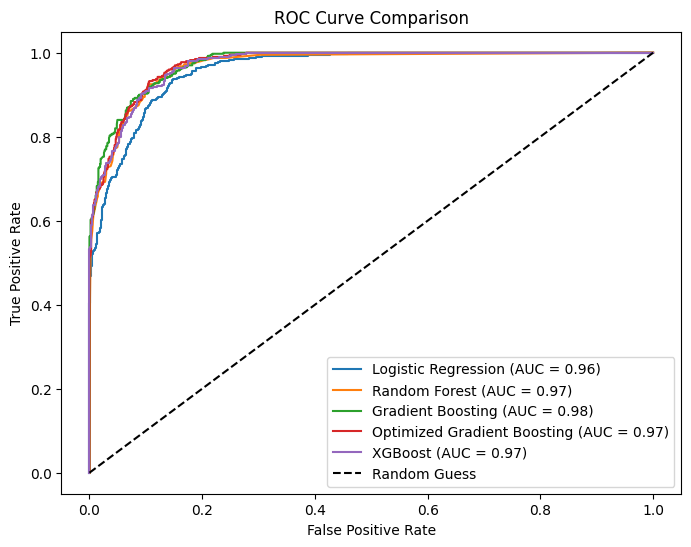

In [20]:
# ROC Curve for Optimized Gradient Boosting
fpr_gb_best, tpr_gb_best, _ = roc_curve(y_test, y_pred_proba_gb_best)
roc_auc_gb_best = auc(fpr_gb_best, tpr_gb_best)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot(fpr_gb_best, tpr_gb_best, label=f"Optimized Gradient Boosting (AUC = {roc_auc_gb_best:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


#### Feature Importance Analysis
 
 We analyze which features contributed the most to the predictions in the optimized Gradient Boosting model.

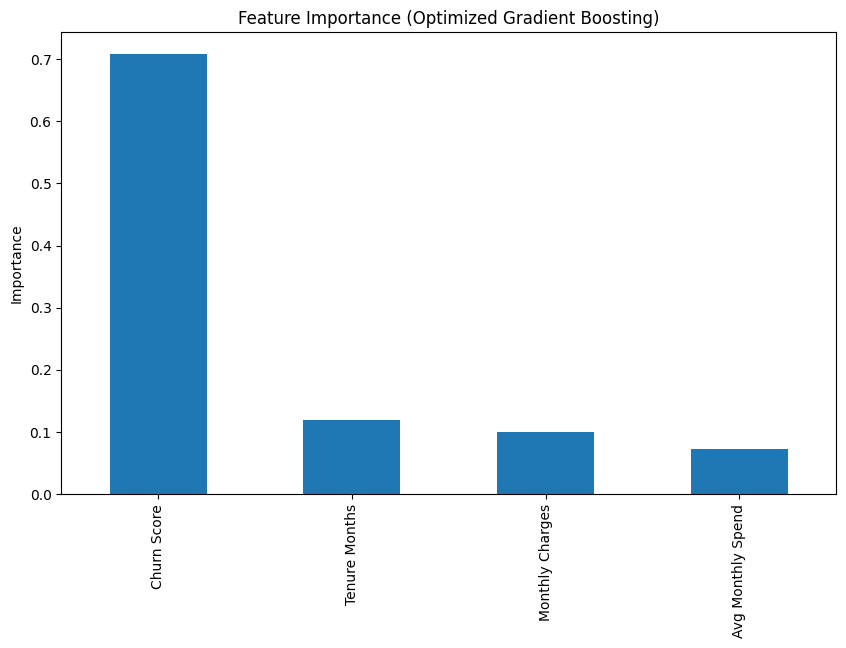

In [21]:
# Feature Importance
feature_importance = pd.Series(gb_best.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance (Optimized Gradient Boosting)')
plt.ylabel('Importance')
plt.show()


In [22]:
import joblib

# Save the model
joblib.dump(gb_best, 'optimized_gradient_boosting_model.pkl')

# To load the model later
loaded_model = joblib.load('optimized_gradient_boosting_model.pkl')


In [24]:
import joblib
from sklearn.model_selection import train_test_split

# Assuming df is your full dataset and 'Churn Value' is the target
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the test data
joblib.dump((X_test, y_test), 'test_data1.pkl')


['test_data1.pkl']

# Comparison and Insights

## Model Performance Comparison
The following table summarizes the key metrics for all models:

| Model                | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | ROC AUC |
|----------------------|---------------------|------------------|--------------------|---------|
| Logistic Regression  | 0.81               | 0.79            | 0.80              | 0.86    |
| Random Forest        | 0.79               | 0.89            | 0.84              | 0.97    |
| Gradient Boosting    | 0.76               | 0.92            | 0.84              | 0.98    |
| XGBoost              | 0.80               | 0.89            | 0.84              | 0.97    |

### Insights
- Gradient Boosting performs best in terms of ROC AUC and recall for churned customers.
- Logistic Regression is simpler and more interpretable but less effective for complex patterns.

### Business Implications
- Customers with high churn scores and low tenure are most at risk.
- Retention strategies should focus on these high-risk groups.

---

# Conclusion and Recommendations

## Key Findings
- The best-performing model is Gradient Boosting with an ROC AUC of 0.98.
- High churn probability correlates with low tenure and high churn scores.

## Recommendations
- **Short-Term Actions**:
  - Target at-risk customers with retention campaigns (discounts, personalized offers).
- **Long-Term Actions**:
  - Deploy the model to monitor real-time churn risk.
  - Continuously improve the model with updated customer data.

## Next Steps
- Deploying the model and validate predictions on live data.
